# Image Classification using a simple neural network

![title](images/ml_banner.png)

We will create a simple neural network to classify [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

In [1]:
import os

In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

# import MNIST dataset
from tensorflow.keras.datasets import mnist

In [4]:
print("NumPy version: {}".format(np.__version__))
print("TensorFlow version: {}".format(tf.__version__))

NumPy version: 1.23.3
TensorFlow version: 2.9.1


***

## The MNIST Dataset

The [MNSIT dataset](http://yann.lecun.com/exdb/mnist/) is a collection of 70,000 grayscale images of handwritten digits from 0 to 9. Here are 40 of the images included in the MNIST dataset:

<img src="./images/mnist1.png" style="width: 600px;">

## Loading the Data

We use [Tensorflow 2](https://www.tensorflow.org/tutorials/quickstart/beginner) framework including the [Keras API](https://keras.io/). Keras provides also modules containing many helper methods for [many common datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets), including MNIST.

In [5]:
# split the data between train and validation sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The data have been automatically split into 4 sets:

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the model's predictions during training
3. `x_test`: Images *set aside* for testing the performance of the model after it has been trained
4. `y_test`: Correct labels for the `x_test` images, used to evaluate the model's predictions after it has been trained

## Exploring the MNIST Data

MNIST dataset containes 70,000 images. Each image is a 2D array of size 28x28.
Keras split this dataset as follows:
* 60,000 images for training
* 10,000 imagnes for testing

In [6]:
# check shapes of the datasets
print("Shape of the training dataset: {}".format(x_train.shape))
print("Shape of the test dataset: {}".format(x_test.shape))

Shape of the training dataset: (60000, 28, 28)
Shape of the test dataset: (10000, 28, 28)


The MNIST images are represented as a collection of unsigned 8-bit integer values between 0 and 255. The values corresponding with a pixel's grayscale value where `0` is black, `255` is white, and all other values are in between.

In [7]:
# check data type
print("Data type: {}".format(x_train.dtype))

Data type: uint8


In [8]:
# check minimum and maximum values
print("Minimum value: {}".format(x_train.min()))
print("Maximum value: {}".format(x_train.max()))

Minimum value: 0
Maximum value: 255


In [9]:
# check a sample matrix
num_image = 186

# image
image = x_train[num_image]

# print image shape
print("Image shape: {}".format(image.shape))

# print image
print(image)

Image shape: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  39 173 207  76   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 141 252 252 143   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  55 230 252 252 127   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 181 252 236 101   8   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 181 235  70   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  38 

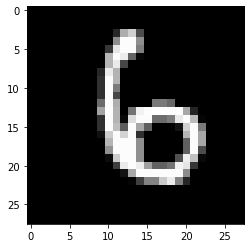

In [10]:
# plot the sample image
plt.imshow(image, cmap="gray")

plt.show()

The label related to this image (the number) is in the array `y_train`.

In [11]:
y_train[num_image]

6

In [12]:
# check the labels
print("Shape of the list of the training labels: {}".format(y_train.shape))
print("Shape of the list of the test labels: {}".format(y_test.shape))

Shape of the list of the training labels: (60000,)
Shape of the list of the test labels: (10000,)


In [13]:
print("Unique labels in the training dataset: {}".format(np.unique(y_train)))
print("Unique labels in the test dataset: {}".format(np.unique(y_test)))

Unique labels in the training dataset: [0 1 2 3 4 5 6 7 8 9]
Unique labels in the test dataset: [0 1 2 3 4 5 6 7 8 9]


## Preparing the Data for Training

In machine learning, it is common that data needs to be transformed to be suitable for training:

1. Flatten the image data
2. Normalize the image data
3. Categorize the labels

### Flattening the Image Data

First, we will [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) each image into a 1D array of 28x28 = 784 values.

In [14]:
x_train = x_train.reshape(60000, 784)  # reshape training set
x_test = x_test.reshape(10000, 784)    # reshape test set

In [15]:
# check the new shape
print("Shape of the training dataset: {}".format(x_train.shape))
print("Shape of the test dataset: {}".format(x_test.shape))

Shape of the training dataset: (60000, 784)
Shape of the test dataset: (10000, 784)


In [16]:
# flattened image
flat_image = x_train[num_image]

# check shape of the flattened image
print("Shape of the image: {}".format(flat_image.shape))

# check flattened image
print(flat_image)

Shape of the image: (784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  39 173 207  76   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 141 252 252
 143   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  55 230 252 252 127   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 181 252
 236 101   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 181 235  70   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
 235 180   0   0   0   0

### Normalizing the Image Data

Converting integer values to floating point values between 0 and 1.

In [17]:
x_train = x_train / 255
x_test  = x_test  / 255 

In [18]:
# check the data type
print("Data type after being normalized: {}".format(x_train.dtype))

Data type after being normalized: float64


In [19]:
# check minimum and maximum values
print("Minimum value: {}".format(x_train.min()))
print("Maximum value: {}".format(x_train.max()))

Minimum value: 0.0
Maximum value: 1.0


In [20]:
# normalized image
norm_image = x_train[num_image]

# print
np.set_printoptions(precision=3)
print(norm_image)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.153
 0.678 0.812 0.298 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.553 0.988 0.988 0.561 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.216 0.902 0.988 0.988 0.498 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.  

### Categorically Encoding the Labels

Keras provides a utility to [categorically encode values](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), and here we use it to perform categorical encoding for both the training and validation labels:

In [21]:
num_categories = 10  # number of categories (0, 1, 2,... , 9)

# categorical encoding
y_train = keras.utils.to_categorical(y_train, num_categories)
y_test  = keras.utils.to_categorical(y_test, num_categories)

Print first 10 values of the training labels, which have been categorically encoded:

In [22]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Split training dataset into training and validation parts

Finally, we shall split the training dataset into training and validation subsets.

In [23]:
# shuffle the training dataset
ind = np.random.permutation(len(x_train))  # random permutation of indices

x_train = x_train[ind]
y_train = y_train[ind]

In [24]:
x_train.shape

(60000, 784)

Set 10% of the training dataset as validation set. The rest will remain as training dataset.

In [25]:
pval = .1                             # relative size of the validation dataset
num_valid = int(pval * len(x_train))  # number of images in the validation dataset

# validation dataset
x_valid = x_train[:num_valid,:]
y_valid = y_train[:num_valid,:]

# training dataset
x_train = x_train[num_valid:,:]
y_train = y_train[num_valid:,:]

In [26]:
# check the size of training and validation dataset
print("Size of the trainig dataset: {}".format(len(x_train)))
print("Size of the validation dataset: {}".format(len(x_valid)))

Size of the trainig dataset: 54000
Size of the validation dataset: 6000


***

## Creating the Model: neural network

Now we prepare the model consisted of several *layers*, which can be divided into the three groups:

1. An `input layer`, which will receive data in some expected format
2. Several `hidden layers`
3. An `output layer`, which will depict the network's guess for a given image

<img src="./images/nn_dense.jpg" style="width: 600px;">

Figure source: F. Bre *et al.*, Energy and Buildings 158, 1429 (2018)

### Instantiating the Model

We will use Keras's [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
# instantiate model
model = Sequential()

### Creating the Input Layer

Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class.

In [29]:
from tensorflow.keras.layers import Dense

* The `units` argument specifies the number of neurons in the layer. Initially, we use `512`.
* The `activation` argument is the activation function. We use `relu` actiovation function.
* The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values.

In [30]:
model.add(
    Dense(units=512, activation="relu", input_shape=(784,))
)

### Creating the Hidden Layer

Now we add an additional densely connected layer.

In [31]:
model.add(
    Dense(units=512, activation="relu")
)

### Creating the Output Layer

Finally, we add an output layer. This layer uses the activation function `softmax`.

#### Softmax output layer

If we use `softmax` activation in the output layer, the output we obtain vector $\vec{p} = (p_1, p_2, \dots, p_{n_{\rm out}})$, where $n_{\rm out} = 10$
is the number of categories, and $p_i$ is the propability that the image belongs to the $i$-th category.
Thus, $p_i \in \left\langle 0, 1 \right\rangle$, and
\begin{equation}
    \sum_{i=1}^{n_{\rm out}} p_{i} = 1\,.
\end{equation}

In [32]:
model.add(
    Dense(units=10, activation="softmax")
)

### Summarizing the Model

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

Now we [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) the model. Here we specify a [loss function](https://developers.google.com/machine-learning/glossary#loss) which will evaluate how well the model is performing during the training. We use `categorical cross-entropy`. We also specify that we would like to track `accuracy` while the model trains.

#### Categorical cross-entropy

Categorical cross-entropy for given image is defined as
\begin{equation}
    H = -\sum_{i=1}^{n_{\rm out}} q_i\, \log p_i\,,
\end{equation}
where
* $n_{\rm out}$ is the *output size*: number of neurons in the output layer, or number of categories ($n_{\rm out} = 10$)
* $p_i$ is the value on the $i$-th neuron of the output layer (what we obtained)
* $q_i$ is the corresponding targed value (categorically encoded label)

Training/validation loss is calculated as a sum of $H$ for all training/validation data.

#### Accuracy

The accuracy is defined as
\begin{equation}
    {\rm Accuracy} = \frac{N_{\rm correct}}{N_{\rm total}}\,,
\end{equation}
where
* $N_{\rm correct}$ number of correctly classified images of the training/validation dataset
* $N_{\rm total}$ total number of images in the training/validation dataset

In [34]:
model.compile(
    loss="categorical_crossentropy", metrics=["accuracy"]
)

## Training the Model

When fitting ([training](https://www.tensorflow.org/guide/keras/train_and_evaluate)) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:
* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The number of samples (images) in one batch
* The validation or test data, and its labels

In [35]:
num_epochs = 10  # number of epochs
batch_size = 8   # batch size

history = model.fit(
    x_train, y_train, epochs=num_epochs, verbose=1, batch_size=batch_size, 
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
6750/6750 [==============================] - 17s 3ms/step - loss: 0.2697 - accuracy: 0.9366 - val_loss: 0.2407 - val_accuracy: 0.9597
Epoch 2/10
6750/6750 [==============================] - 16s 2ms/step - loss: 0.2176 - accuracy: 0.9632 - val_loss: 0.2098 - val_accuracy: 0.9637
Epoch 3/10
6750/6750 [==============================] - 17s 3ms/step - loss: 0.2006 - accuracy: 0.9706 - val_loss: 0.2334 - val_accuracy: 0.9722
Epoch 4/10
6750/6750 [==============================] - 17s 3ms/step - loss: 0.1819 - accuracy: 0.9738 - val_loss: 0.1894 - val_accuracy: 0.9733
Epoch 5/10
6750/6750 [==============================] - 17s 2ms/step - loss: 0.1683 - accuracy: 0.9771 - val_loss: 0.3076 - val_accuracy: 0.9632
Epoch 6/10
6750/6750 [==============================] - 16s 2ms/step - loss: 0.1608 - accuracy: 0.9792 - val_loss: 0.2935 - val_accuracy: 0.9768
Epoch 7/10
6750/6750 [==============================] - 16s 2ms/step - loss: 0.1634 - accuracy: 0.9813 - val_loss: 0.3051 - val_ac

### Observing Accuracy

For each epoch, notice the `accuracy` and `val_accuracy` scores. `accuracy` states how well the model did for the epoch on all the training data. `val_accuracy` states how well the model did on the validation data, which if you recall, was not used at all for training the model.

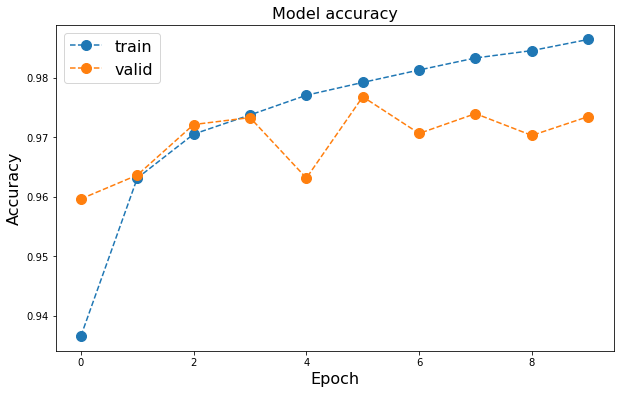

In [51]:
# plot accuracy 

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(history.history["accuracy"], "o--", markersize=10)
ax.plot(history.history["val_accuracy"], "o--", markersize=10)

ax.set_title("Model accuracy", size=16)
ax.set_ylabel("Accuracy", size=16)
ax.set_xlabel("Epoch", size=16)

ax.legend(["train", "valid"], loc="upper left", fontsize=16)

plt.show()

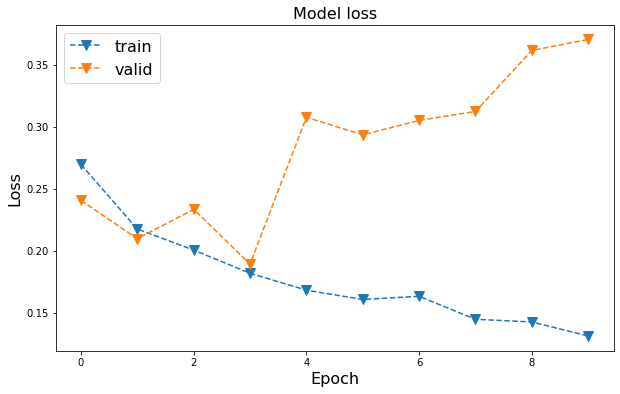

In [52]:
# plot loss

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(history.history["loss"], "v--", markersize=10)
ax.plot(history.history["val_loss"], "v--", markersize=10)

ax.set_title("Model loss", size=16)
ax.set_ylabel("Loss", size=16)
ax.set_xlabel("Epoch", size=16)

ax.legend(["train", "valid"], loc="upper left", fontsize=16)

plt.show()

### Important

* Take care about `overfitting`!

***

## Evaluate model against test data

Now evaluate the trained model on data in the test dataset using [evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) method.

In [53]:
test_loss, test_accuracy = model.evaluate(
    x_test, y_test, batch_size=batch_size
)

print("Test loss: {:.5f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(test_accuracy*100))

1250/1250 [==============================] - 1s 630us/step - loss: 0.4192 - accuracy: 0.9714
Test loss: 0.41919
Test accuracy: 97.14%


***

## Predictions

Finally, we apply the neural network to do some predictions.

In [54]:
Out = model.predict(x_test)

313/313 [==============================] - 0s 762us/step


Check few outputs of the neural network.

In [55]:
print(Out[:10])

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.323e-26 1.000e+00 2.637e-22 1.875e-27 5.949e-21 6.924e-21 7.057e-18
  9.108e-26 6.002e-19 2.227e-26]
 [9.999e-01 1.695e-12 1.722e-05 3.619e-10 3.757e-05 1.825e-11 8.937e-08
  6.205e-12 4.743e-12 5.369e-07]
 [0.000e+00 2.110e-37 1.400e-37 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  4.576e-30 0.000e+00 5.312e-24]
 [1.661e-20 1.000e+00 1.339e-16 7.422e-20 7.146e-15 3.560e-18 3.025e-16
  1.176e-16 3.896e-15 1.044e-19]
 [0.000e+00 2.502e-16 1.111e-30 7.136e-25 1.000e+00 1.138e-31 7.684e-33
  6.805e-23 1.455e-21 1.036e-17]
 [1.549e-24 2.156e-08 2.308e-15 8.846e-01 3.003e-08 2.070e-06 1.390e-19
  4.824e-11 3.559e-06 1.153e-01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.990e-01 9.953e-04
  0.000e+00 1.127e-22 6.343e-21]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.065e-35 0.0

Turn categorical encoding into numbers

In [56]:
predictions = np.argmax(Out, axis=1)
labels      = np.argmax(y_test, axis=1)

Check some of the predictions and compare them with the labels.

In [57]:
print(predictions[:30])
print(labels[:30])

[7 2 1 0 4 1 4 3 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


***

## Check incorrect predictions

In [58]:
incorr_ind = np.where(predictions != labels)[0]  # position of incorrectly classified images

print("Number of incorrectly classified images out of {:d} in the test dataset: {:d}".format(len(predictions), len(incorr_ind)))

Number of incorrectly classified images out of 10000 in the test dataset: 286


Print some of the incorrect results

In [59]:
print(predictions[incorr_ind[:30]])
print(labels[incorr_ind[:30]])

[3 1 9 3 6 8 7 3 0 9 8 1 3 8 2 8 6 8 6 1 1 8 6 1 9 9 9 6 8 9]
[9 7 4 2 4 9 2 5 6 4 9 2 7 0 8 2 4 1 2 2 7 4 0 7 4 4 7 8 3 8]


plot some of the incorrectly classified images

prediction: 3, label: 9


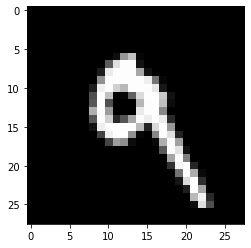

prediction: 1, label: 7


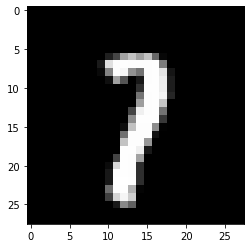

prediction: 9, label: 4


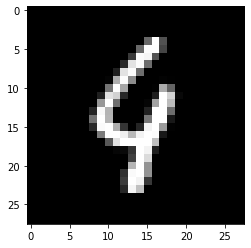

prediction: 3, label: 2


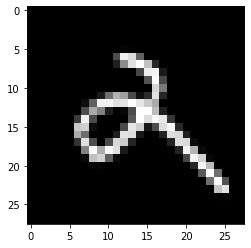

prediction: 6, label: 4


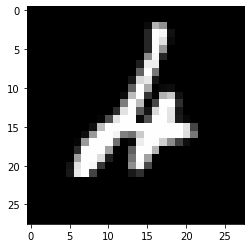

In [60]:
for ind in incorr_ind[:5]:
    image = x_test[ind].reshape(28,28)
    
    print("prediction: {:d}, label: {:d}".format(predictions[ind], labels[ind]))
    plt.imshow(image, cmap="gray")
    
    plt.show()

***

## Save and load model

You can [save the trained model and load it](https://www.tensorflow.org/tutorials/keras/save_and_load) in the future.

In [61]:
model.save("saved_models/nn_mnist")  # save the model

INFO:tensorflow:Assets written to: saved_models/nn_mnist/assets


In [62]:
ls saved_models/

nn_mnist/


In [63]:
model2 = tf.keras.models.load_model("saved_models/nn_mnist/")  # load model

In [64]:
# check the loaded model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [65]:
# evaluate the loaded model
test_loss, test_accuracy = model2.evaluate(
    x_test, y_test, batch_size=batch_size
)

print("Test loss: {:.5f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(test_accuracy*100))

1250/1250 [==============================] - 1s 638us/step - loss: 0.4192 - accuracy: 0.9714
Test loss: 0.41919
Test accuracy: 97.14%
